In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

## Task 12.8

Carry out a principal component analysis on all six variables of the glucose data of Table 3.8. Use both **S** and **R**. Which do you think is more appro- priate here? Show the percent of variance explained. Based on the average eigenvalue or a scree plot, decide how many components to retain. Can you interpret the components of either **S** or **R**?


In [2]:
data = np.loadtxt('T3_8_GLUCOSE.DAT', dtype=float)
n, d = data.shape
data.shape

(50, 6)

In [3]:
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)

# data = (data - data_mean) / data_std

data_cov = np.cov(data, rowvar=False)
data_corr = np.corrcoef(data, rowvar=False)

## Matrix **S**

In [10]:
eigen_values, eigen_vectors = np.linalg.eigh(data_cov)
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[sorted_index]

In [12]:
explained_variance_ratio = np.cumsum(eigen_values) / np.sum(eigen_values)

for idx, exp_var in enumerate(explained_variance_ratio):
    print(f'n_components = {idx+1}: {exp_var:.3}')

n_components = 1: 0.557
n_components = 2: 0.748
n_components = 3: 0.898
n_components = 4: 0.945
n_components = 5: 0.978
n_components = 6: 1.0


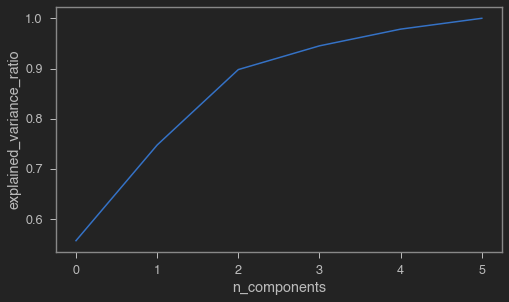

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 4.5))

ax.plot(explained_variance_ratio);
ax.set_xlabel('n_components');
ax.set_ylabel('explained_variance_ratio');

In [14]:
n_components = 3
data_transformed = data @ eigen_vectors[:, :n_components]
data_transformed.shape

(50, 3)

In [15]:
df = pd.DataFrame(data_transformed)
fig = px.scatter_3d(
    df, x=0, y=1, z=2,
    size_max=18, opacity=0.7
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Matrix **R**

In [18]:
eigen_values, eigen_vectors = np.linalg.eigh(data_corr)
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[sorted_index]

In [20]:
explained_variance_ratio = np.cumsum(eigen_values) / np.sum(eigen_values)

for idx, exp_var in enumerate(explained_variance_ratio):
    print(f'n_components = {idx+1}: {exp_var:.3}')

n_components = 1: 0.363
n_components = 2: 0.543
n_components = 3: 0.706
n_components = 4: 0.85
n_components = 5: 0.942
n_components = 6: 1.0


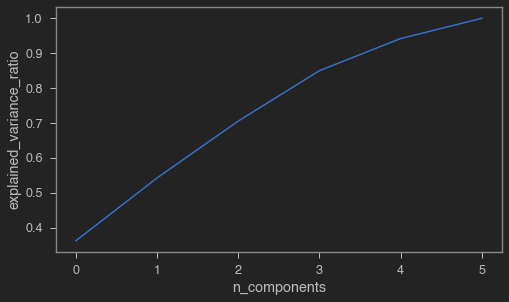

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8, 4.5))

ax.plot(explained_variance_ratio);
ax.set_xlabel('n_components');
ax.set_ylabel('explained_variance_ratio');

In [22]:
n_components = 3
data_transformed = data @ eigen_vectors[:, :n_components]
data_transformed.shape

(50, 3)

In [23]:
df = pd.DataFrame(data_transformed)
fig = px.scatter_3d(
    df, x=0, y=1, z=2,
    size_max=18, opacity=0.7
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Task 12.10

Carry out a principal component analysis separately for males and females in the psychological data of Table 5.1. Compare the results for the two groups. Use **S**.

In [24]:
data = np.loadtxt('T5_1_PSYCH.DAT', dtype=float)
n, d = data.shape
data.shape

(64, 5)

In [25]:
males_data = data[data[:, 0] == 1][:, 1:]
females_data = data[data[:, 0] == 2][:, 1:]

assert females_data.shape == males_data.shape

In [26]:
males_data_mean = males_data.mean(axis=0)
males_data_std = males_data.std(axis=0)

# males_data = (males_data - males_data_mean) / males_data_std

males_data_cov = np.cov(males_data, rowvar=False)

In [28]:
males_eigen_values, males_eigen_vectors = np.linalg.eigh(males_data_cov)
males_sorted_index = np.argsort(males_eigen_values)[::-1]
males_eigen_values = males_eigen_values[males_sorted_index]
males_eigen_vectors = males_eigen_vectors[males_sorted_index]

In [29]:
males_explained_variance_ratio = np.cumsum(males_eigen_values) / np.sum(males_eigen_values)

for idx, exp_var in enumerate(males_explained_variance_ratio):
    print(f'n_components = {idx+1}: {exp_var:.3}')

n_components = 1: 0.684
n_components = 2: 0.859
n_components = 3: 0.96
n_components = 4: 1.0


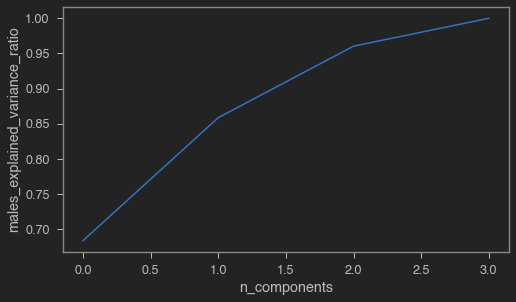

In [30]:
fig, ax = plt.subplots(1,1, figsize=(8, 4.5))

ax.plot(males_explained_variance_ratio);
ax.set_xlabel('n_components');
ax.set_ylabel('males_explained_variance_ratio');

In [31]:
females_data_mean = females_data.mean(axis=0)
females_data_std = females_data.std(axis=0)

# females_data = (females_data - females_data_mean) / females_data_std

females_data_cov = np.cov(females_data, rowvar=False)

In [32]:
females_eigen_values, females_eigen_vectors = np.linalg.eigh(females_data_cov)
females_sorted_index = np.argsort(females_eigen_values)[::-1]
females_eigen_values = females_eigen_values[females_sorted_index]
females_eigen_vectors = females_eigen_vectors[females_sorted_index]

In [33]:
females_explained_variance_ratio = np.cumsum(females_eigen_values) / np.sum(females_eigen_values)

for idx, exp_var in enumerate(females_explained_variance_ratio):
    print(f'n_components = {idx+1}: {exp_var:.3}')

n_components = 1: 0.571
n_components = 2: 0.786
n_components = 3: 0.944
n_components = 4: 1.0


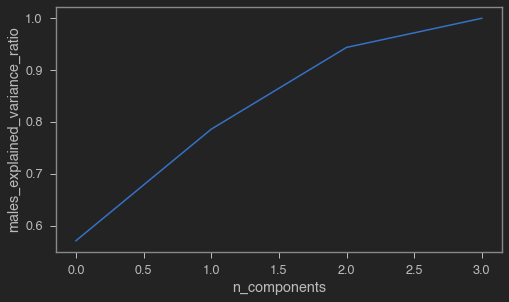

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8, 4.5))

ax.plot(females_explained_variance_ratio);
ax.set_xlabel('n_components');
ax.set_ylabel('males_explained_variance_ratio');

In [35]:
n_components = 3

males_data_transformed = males_data @ males_eigen_vectors[:, :n_components]
females_data_transformed = females_data @ females_eigen_vectors[:, :n_components]

In [36]:
males_df = pd.DataFrame(males_data_transformed)
males_df['gender'] = 'males'
females_df = pd.DataFrame(females_data_transformed)
females_df['gender'] = 'females'

df = pd.concat([males_df, females_df])

fig = px.scatter_3d(
    df, x=0, y=1, z=2, color='gender',
    size_max=18, opacity=0.7
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))